In [6]:
import io
import os
import re
import shutil
import string
import tensorflow as tf
import json
import csv

from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from math import *
from nltk import word_tokenize
from nltk import WordNetLemmatizer


In [8]:
def get_corpus(docs_path):
    title_index = 14
    desc_index = 1
    corpus = {}
    with open(docs_path, "r") as file:
        read_csv = csv.reader(file)
        i = 0
        for line in read_csv:
            title = prepare_text(line[title_index])
            desc = prepare_text(line[desc_index])

            corpus[i] = (title, desc)
            i += 1

    return corpus


def prepare_text(raw_text):
    tokens = word_tokenize(raw_text)

    tokens = [word for word in tokens if word.isalpha()]

    tokens = [word.lower() for word in tokens]


    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word, pos="v") for word in tokens]
    tokens = [lemma.lemmatize(word, pos="n") for word in tokens]
    return tokens

def get_words(corpus):
    words = {}
    for (title, text) in corpus.values():
        for word in title:
            count = words.get(word, 0)
            words[word] = count + 1
        for word in text:
            count = words.get(word, 0)
            words[word] = count + 1
    return words


corpus = get_corpus('data/ted_talks.csv')
words = get_words(corpus)

In [9]:
df = pd.DataFrame.from_dict(words, orient='index', columns=['count'])
df = df.reset_index()
df.sort_values('count', ascending=False).head(n=20)

index  count
26    the   6725
50      a   4957
12    and   4590
77     of   4163
52     to   3975
35     in   2735
200    be   2592
20   that   1604
16    for   1375
80     it   1225
104   how   1213
135    we   1195
29   with   1075
33     he    962
121  this    935
92   talk    905
156    on    863
48   from    847
220   his    751
487  have    749

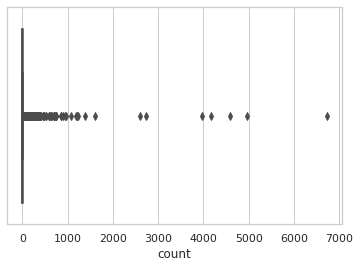

In [10]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df["count"]);

In [11]:
#we assume that each stopword has count more than 2 thousand in this collection. 
stopwords = df[df['count'] > 2000]
stopwords

index  count
12    and   4590
26    the   6725
35     in   2735
50      a   4957
52     to   3975
77     of   4163
200    be   2592

In [12]:
#export stopwords for further use
s = stopwords['index'].tolist()
print(s)
with open('english_stopwords.txt', 'w') as f:
    for item in s:
        f.write("%s\n" % item)

['and', 'the', 'in', 'a', 'to', 'of', 'be']
